# High Frequency Flow Data: Introduction to Dygraphs

This lesson was adapted from educational material written by [Dr. Kateri Salk](https://www.hydroshare.org/user/4912/) and teaching assistant Cathy Chamberlin for her Fall 2019 Hydrologic Data Analysis course at Duke University. This is the first part of a two-part exercise focusing on high frequency flow data. 

## Introduction
High frequency data is usually defined as frequencies significantly lower than daily (e.g. 5-minute, 15-minute, 1 hr etc). The large amount of data allows us to distinguish between different models (model validation) with a higher statistical precision. Baseflow is a portion of streamflow that is not directly generated from the excess rainfall during a storm event. In other words, this is the flow that would exist in the stream without the contribution of direct runoff from the rainfall. It should not be confused with groundwater flow. Quickflow is the part of a storm rainfall which moves quickly to a stream channel via surface runoff or overland flow, and forms a flood wave in the channel.  What types of hydrological and biological processes happen on this timescale that we might want to investigate?

## Learning Objectives

After successfully completing this notebook, you will be able to:
1. Determine stormflow and baseflow from high frequency flow data
2. Communicate findings with peers through oral, visual, and written modes

## Requirements to Complete Lesson 

### Packages
This lesson requires the installation of the following R packages to run the provided script:
- `ggplot2`- Version 3.3.3. Creates elegant data visualisations using the Grammar of Graphics.
- `tidyverse`- Version 1.3.0. A collection of R packages designed for data science.
- `lubridate`- Version 1.7.9. Functions for working with dates/times.
- `scales`- Version 1.1.1. Graphical scales provide methods for automatically determining breaks and labels for axes and legends.
- `dataRetrival`- Version 2.7.6. Retrieval Functions for USGS and EPA Hydrologic and Water Quality Data.
- `cowplot`- Version 1.1.1. Provides various features that help with creating publication-quality figures with 'ggplot2'.
- `EcoHydRology`- Version 0.4.12.1. This package provides a flexible foundation for scientists, engineers, and policy makers to base teaching exercises as well as for more applied use to model complex eco-hydrological interactions.
- `xts`- Version 0.12.1. Provides for uniform handling of R's different time-based data classes by extending zoo, maximizing native format information preservation and allowing for user level customization and extension, while simplifying cross-class interoperability.
- `dygraphs`- Version 1.1.1.6. R interface for the dygraphs Javascript charting library. Provides rich facilities for charting time-series data in R, including highly configurable series- and axis-display and interactive features like zoom/pan and series/point highlighting.

### Data and Code 

This lesson will import instantaneous value data from the National Water Information System for Third Fork Creek and Ellerbe Creek in North Carolina for the entire period of record using the `dataRetrieval` package. The package was created to make querying and downloading hydrologic data from the USGS National Water Information System (NWIS) and the multi-agency database, Water Quality Portal (WQP) easier. NWIS contains streamflow, peak flow, rating curves, groundwater, and water quality data data collected by or for the USGS. WQP only contains water quality data.

It should be noted that the databases are not static as data is constantly being added.  For more in-depth information on the `dataRetrieval` package, please visit https://cran.r-project.org/web/packages/dataRetrieval/vignettes/dataRetrieval.html. 

The code provided in this resource was developed using R version 3.6.1. 

### Set Working Directory 

In R, the working directory is the directory where R starts when looking for any file to open (as directed by a file path) and where it saves any output. This lesson assumes that you have set your working directory to the folder location of the downloaded and unzipped data subsets.

### Load packages and set ggplot theme

In [112]:
library(ggplot2)
library(tidyverse)
library(lubridate)
library(scales)
library(dataRetrieval)
library(cowplot)
library(EcoHydRology)
library(xts)
library(dygraphs)

theme_set(theme_gray()) 

## Import Instantaneous Value Data for Third Fork Creek and Ellerbe Creek 

 ## `readNWISuv`
 Imports high frequency discharge data from NWIS web service. This function gets the data from here: https://waterservices.usgs.gov/ A list of parameter codes can be found here: https://nwis.waterdata.usgs.gov/nwis/pmcodes/ A list of statistic codes can be found here: https://nwis.waterdata.usgs.gov/nwis/help/?read_file=stat&format=table. More information on the web service can be found here: https://waterservices.usgs.gov/rest/IV-Service.html.

### Import Data from Third Fork Creek

In [113]:
dischargedatTFC2018 <- readNWISuv(
  site = "02097280", #Third Fork Creek at Woodcroft Parkway Near Blands NC
  parameterCd = "00060",
  startDate = "2018-01-01", 
  endDate = "2019-01-01"
  ) %>% 
  renameNWISColumns()

In [114]:
head(dischargedatTFC2018) #view first six observations only

,agency_cd,site_no,dateTime,Flow_Inst,Flow_Inst_cd,tz_cd
,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>
1,USGS,02097280,2018-01-01 05:00:00,1.83,A,UTC
2,USGS,02097280,2018-01-01 05:15:00,2.01,A,UTC
3,USGS,02097280,2018-01-01 05:30:00,2.01,A,UTC
4,USGS,02097280,2018-01-01 05:45:00,2.01,A,UTC
5,USGS,02097280,2018-01-01 06:00:00,2.01,A,UTC
6,USGS,02097280,2018-01-01 06:15:00,2.01,A,UTC


### Import Data from Ellerbe Creek 

In [115]:
dischargedatEC2018 <- readNWISuv(
  site = "0208675010", #Ellerbe Creek at Club Boulevard at Durham, NC
  parameterCd = "00060", 
  startDate = "2018-01-01", 
  endDate = "2019-01-01"
  ) %>% 
  renameNWISColumns()

In [116]:
head(dischargedatEC2018) #view first six observations only

,agency_cd,site_no,dateTime,Flow_Inst,Flow_Inst_cd,tz_cd
,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>
1,USGS,0208675010,2018-01-01 05:00:00,0.46,A,UTC
2,USGS,0208675010,2018-01-01 05:15:00,0.46,A,UTC
3,USGS,0208675010,2018-01-01 05:30:00,0.46,A,UTC
4,USGS,0208675010,2018-01-01 05:45:00,0.46,A,UTC
5,USGS,0208675010,2018-01-01 06:00:00,0.46,A,UTC
6,USGS,0208675010,2018-01-01 06:15:00,0.46,A,UTC


### Look at the structure of the data frames 

In [117]:
str(dischargedatTFC2018)

'data.frame':	34640 obs. of  6 variables:
 $ agency_cd   : chr  "USGS" "USGS" "USGS" "USGS" ...
 $ site_no     : chr  "02097280" "02097280" "02097280" "02097280" ...
 $ dateTime    : POSIXct, format: "2018-01-01 05:00:00" "2018-01-01 05:15:00" ...
 $ Flow_Inst   : num  1.83 2.01 2.01 2.01 2.01 2.01 2.19 2.01 1.83 2.01 ...
 $ Flow_Inst_cd: chr  "A" "A" "A" "A" ...
 $ tz_cd       : chr  "UTC" "UTC" "UTC" "UTC" ...
 - attr(*, "url")= chr "https://nwis.waterservices.usgs.gov/nwis/iv/?site=02097280&format=waterml,1.1&ParameterCd=00060&startDT=2018-01"| __truncated__
 - attr(*, "siteInfo")='data.frame':	1 obs. of  13 variables:
  ..$ station_nm          : chr "THIRD FORK CR AT WOODCROFT PARKWAY NR BLANDS, NC"
  ..$ site_no             : chr "02097280"
  ..$ agency_cd           : chr "USGS"
  ..$ timeZoneOffset      : chr "-05:00"
  ..$ timeZoneAbbreviation: chr "EST"
  ..$ dec_lat_va          : num 35.9
  ..$ dec_lon_va          : num -79
  ..$ srs                 : chr "EPSG:4326"
  ..$ sit

In [118]:
str(dischargedatEC2018)

'data.frame':	34293 obs. of  6 variables:
 $ agency_cd   : chr  "USGS" "USGS" "USGS" "USGS" ...
 $ site_no     : chr  "0208675010" "0208675010" "0208675010" "0208675010" ...
 $ dateTime    : POSIXct, format: "2018-01-01 05:00:00" "2018-01-01 05:15:00" ...
 $ Flow_Inst   : num  0.46 0.46 0.46 0.46 0.46 0.46 0.46 0.46 0.46 0.46 ...
 $ Flow_Inst_cd: chr  "A" "A" "A" "A" ...
 $ tz_cd       : chr  "UTC" "UTC" "UTC" "UTC" ...
 - attr(*, "url")= chr "https://nwis.waterservices.usgs.gov/nwis/iv/?site=0208675010&format=waterml,1.1&ParameterCd=00060&startDT=2018-"| __truncated__
 - attr(*, "siteInfo")='data.frame':	1 obs. of  13 variables:
  ..$ station_nm          : chr "ELLERBE CREEK AT CLUB BOULEVARD AT DURHAM, NC"
  ..$ site_no             : chr "0208675010"
  ..$ agency_cd           : chr "USGS"
  ..$ timeZoneOffset      : chr "-05:00"
  ..$ timeZoneAbbreviation: chr "EST"
  ..$ dec_lat_va          : num 36
  ..$ dec_lon_va          : num -78.9
  ..$ srs                 : chr "EPSG:4326"
  

Notice that the date is in POSIXct format. No matter what part of country you extract data from, the time will be given to us in UTC-->Coordinated Universal Time. This allows us to have a standardized unit for all of the data points being taken, and we won't have to worry if the USGS uses daylight saving times in their data collection. 

## Plot Ellerbe Creek Discharge and Third Fork Creek Discharge on the same plot

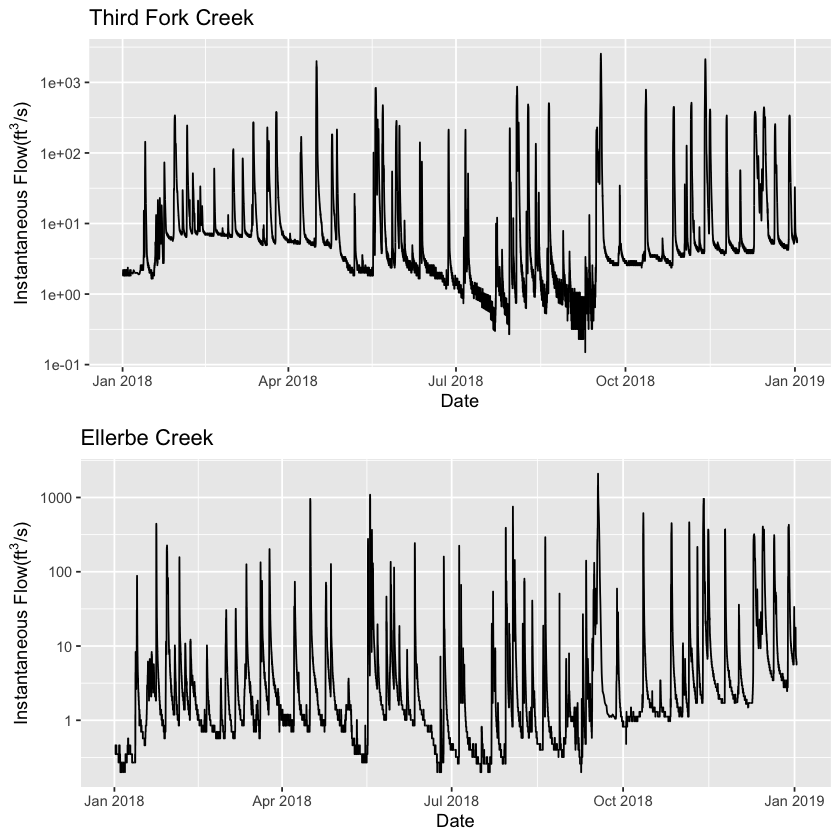

In [119]:
plot_grid(
  ggplot(dischargedatTFC2018, aes(x = dateTime, y = Flow_Inst)) +
    geom_line() + 
    scale_y_log10() +
    labs(x = "Date", y = expression("Instantaneous Flow(ft"^3*"/s)")) +
    ggtitle("Third Fork Creek"),
  ggplot(dischargedatEC2018, aes(x = dateTime, y = Flow_Inst)) + 
    geom_line() + 
    scale_y_log10() +
    labs(x = "Date", y = expression("Instantaneous Flow(ft"^3*"/s)"))+
    ggtitle("Ellerbe Creek"),
  ncol = 1
)

The shape and size of river hydrographs following rain events can tell us how water moves through a watershed. Once rain falls, how does water get to a stream? What would the streamflow do?
>

## Third Fork Creek Baseflow Analysis

## `BaseflowSeparation` 
This function reads a streamflow dataset and produces a baseflow dataset. It can be run using 1, 2 or 3 passes. The output returns a 2 column data frame with nrow = length of input streamflow data. The first column contains baseflow (bt), while the second contains quickflow (qft), both in the same units as the input.

In [120]:
TFCbaseflow <- BaseflowSeparation(
  dischargedatTFC2018$Flow_Inst, #instantaneous discharge flow
  filter_parameter = 0.925, #The value recommended by Nathan and McMahon (1990) is 0.925, however, the user might want to play with this value (0.9-0.95)
  passes = 3
  )
head(TFCbaseflow) #view first six observations of resultant data set

,bt,qft
,<dbl>,<dbl>
1,1.525000,0.0000000
2,1.548128,0.4618719
3,1.570182,0.4398179
4,1.590964,0.4190355
5,1.610102,0.3998985
6,1.627642,0.3823582


### Combine the streamflow dataset and the baseflow dataset by column

In [121]:
TFC2018 <- cbind(dischargedatTFC2018, TFCbaseflow)

## `dygraph`
The package dygraphs produces dynamic graphics so that user can interact with the graph.

## Create a Dygraph of Third Fork 
Within the `dygraph` function, we'll insert the `cbind` function in order to ensure that we have only one dataframe with total flow, baseflow, and quickflow as columns. 

In [122]:
dygraph( xlab="Date", ylab = "Instantaneous Flow (ft3/s)", main = "Baseflow vs. Quickflow at Third Fork Creek",
  cbind(
    Flow = with(TFC2018, xts(Flow_Inst, order.by = dateTime)), #total flow
    Baseflow = with(TFC2018, xts(bt, order.by = dateTime)), #baseflow
    Quickflow = with(TFC2018, xts(qft, order.by = dateTime)) #quickflow
    )) %>%
  dyAxis("y", valueRange = c(0, 2600)) %>%
  dyRangeSelector() 

HTML widgets cannot be represented in plain text (need html)

> Note that this graph is fully interactive: as your mouse moves over the series, individual values are displayed. You can also select regions of the graph to zoom into (double-click zooms out).

## Calculate the proportion of water emerging as quickflow and baseflow

In [123]:
Export <- TFC2018 %>%
  mutate(timestep = c(diff(as.numeric(dateTime)), NA_real_), #find out step between each of the timestamps- most timestamps are 15 min but there are a couple gaps. 
         baseflowexport = bt * timestep,
         quickflowexport = qft * timestep) %>% #ft^3/sec * seconds elapsed to just get the volume

  summarize(BaseflowExport_cf = sum(baseflowexport, na.rm = T),
            QuickflowExport_cf = sum(quickflowexport, na.rm = T),
            TotalExport_cf = BaseflowExport_cf + QuickflowExport_cf)

### Baseflow

In [124]:
Export$Baseflow/Export$TotalExport_cf*100

[1] 51.91867

### Quickflow

In [125]:
Export$QuickflowExport_cf/Export$TotalExport_cf*100

[1] 48.08133

How does the magnitude of baseflow compare to the magnitude of quickflow?
>

## Repeat this baseflow/quickflow analysis for Ellerbe Creek. How do the percentages compare?

In [126]:
Ellerbebaseflow <- BaseflowSeparation(
  dischargedatEC2018$Flow_Inst, 
  filter_parameter = 0.925, 
  passes = 3)

### Bind Ellerbe Data Frame to Ellerbe Baseflow/Quickflow dataframe

In [127]:
EC2018 <- cbind(dischargedatEC2018, Ellerbebaseflow)

## Calculate the proportion of water emerging as quickflow and baseflow

In [128]:

ExportEllerbe <- EC2018 %>%
  mutate(timestep = c(diff(as.numeric(dateTime)), NA_real_), 
         baseflowexport = bt * timestep,
         quickflowexport = qft * timestep) %>% 
  summarize(BaseflowExport_cf = sum(baseflowexport, na.rm = T),
            QuickflowExport_cf = sum(quickflowexport, na.rm = T),
            TotalExport_cf = BaseflowExport_cf + QuickflowExport_cf)

### Baseflow

In [129]:
ExportEllerbe$Baseflow/ExportEllerbe$TotalExport_cf*100

[1] 43.40559

### Quickflow

In [130]:
ExportEllerbe$QuickflowExport_cf/ExportEllerbe$TotalExport_cf*100

[1] 56.59441

Based on the proportions of baseflow and quickflow for both creeks, Ellerbe Creek has more quickflow, but Third Fork Creek has more baseflow. Thus, Ellerbe Creek might have more urban surfaces, roads, and houses, while Third Fork Creek might have more open area. They both are urban streams, however.  